# Task 1  

## General instructions

First, update the following text to have a link to your Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/lunacatalan/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.

Dataset 1: NYC spills 
- record of petroleum spills and other hazardous material 
- many of the fields are not required
- recovery of spills from sewage is sometimes 0 because of dilution
- rows with the same spill number will occur for spills with multiple materials
- begins officially in 1978, and spills are recorded within 72 hours, last updated Nov 8.2023
- Accessed: Nov.8, 2023

Dataset 2: TIGER 
- shapefiles that include info for all 50 states and territories of the USA
- include polygons, line features of roads and hydrography 
- Accessed Nov.8, 2023 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

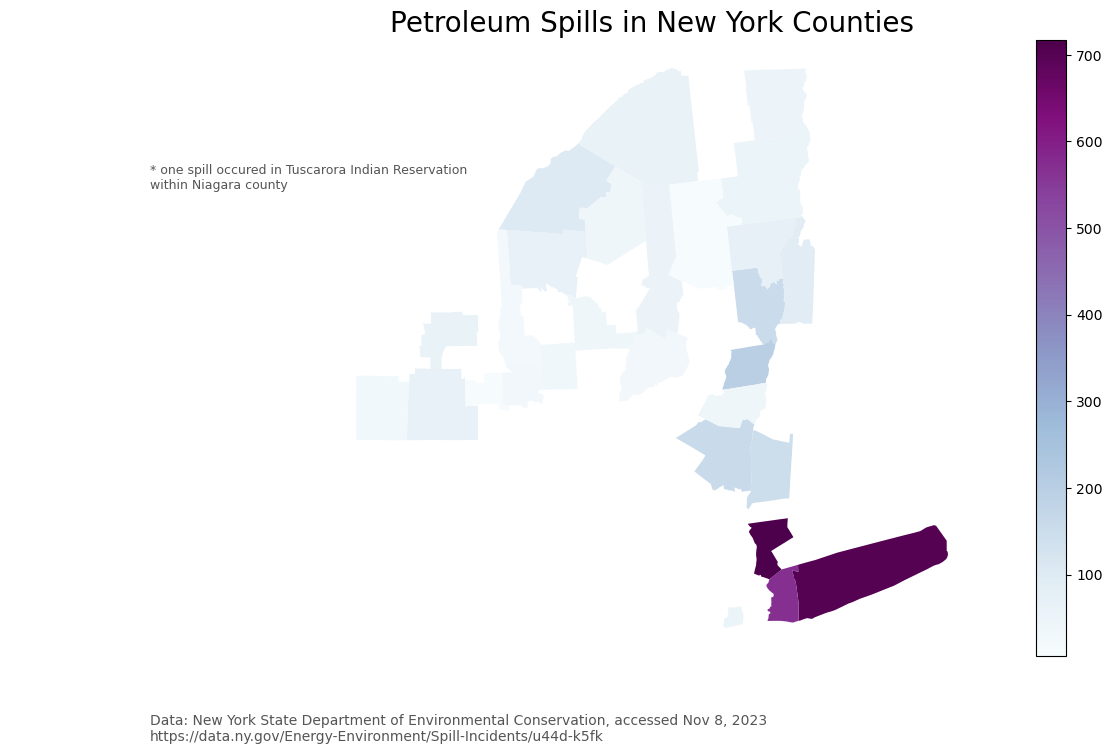

In [18]:
### ===== FINAL CODE =====

# import libraries here

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# read in the spills csv
spills = pd.read_csv("data/Spill_Incidents_20231106.csv") # using this csv because the one I downloaded was missing data

# read in the counties shp files
counties = gpd.read_file('data/tl_2022_us_county/tl_2022_us_county.shp')

# make column names lower case, and add "_" where there is " "
spills.columns = spills.columns.str.lower().str.replace(' ','_')

# make date column into datetime
spills.spill_date = pd.to_datetime(spills.spill_date)

# spills between Jan1, 2023 and Oct 31, 2023, and only petroleum spills
petr_23 = spills[(spills.material_family == "Petroleum") & 
                 (spills["spill_date"].isin(pd.date_range('2023-01-01',
                                                          '2023-10-31')))]

# select columns of interest; get counts of spills for each county 
# reset index back to 0 and rename column spill_number to n_spills
spills_per_county = petr_23[['county', 
                             'spill_number']].groupby('county').nunique().reset_index().rename(columns = {'spill_number' : 
                                                                                                        'n_spills'})

# Simplify column names as needed
counties.columns = counties.columns.str.lower()

# select the statefp code for NY which is 36
ny_counties = counties[counties.statefp == '36']

# select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]

# update St Lawrence name in `spills_per_county` dataframe
spills_per_county.at[st_lawrence_index, 'county'] = 'St. Lawrence'


# to merge...the column names for counties are different, change to make them the same 
ny_counties = ny_counties.rename(columns = {'name' :'county'})

# overwrite ny_counties, inner join these two datasets
ny_counties = pd.merge(ny_counties,
                    spills_per_county,
                    how = 'inner',
                    on = 'county').set_index('county')

# udpate single row by adding 1 spill to Niagara for the Tuscarora Indian Reservation
ny_counties.at['Niagara', 'n_spills'] += 1

# reset the index
ny_counties = ny_counties.reset_index()

# map petroleum spills

fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')

#county.plot(ax=ax)
ny_counties.plot(ax=ax,
                 column = 'n_spills',
                 legend = True,
                 cmap = "BuPu")

ax.set_title('Petroleum Spills in New York Counties',  fontsize=20)

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 8, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.1, 0.01), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')

ax.annotate("* one spill occured in Tuscarora Indian Reservation \nwithin Niagara county", 
            xy=(0.1, .7), # position
            xycoords='figure fraction', 
            fontsize= 9, 
            color='#555555')

plt.show()


<!-- write your description in this markdwon cell -->

## Import libraries

In [355]:
# import libraries here

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [221]:
# read in the spills csv
spills = pd.read_csv("data/Spill_Incidents_20231106.csv")

# read in the counties shp files
counties = gpd.read_file('data/tl_2022_us_county/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [222]:
# 1. check head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [223]:
# 2. Simplify column names, snake_case
# make lower case, and add "_" where there is " "
spills.columns = spills.columns.str.lower().str.replace(' ','_')

In [225]:
# 3.Check the data types of the columns
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [226]:
# 4. unique values in the `material_family` column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [227]:
# 5. unique values in the `county` column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

In [228]:
# look at dates
spills.spill_date

0         10/10/2001
1         08/21/2004
2         08/21/2004
3         08/02/2002
4         01/20/2003
             ...    
542289    07/06/1999
542290    07/28/2003
542291    03/02/1993
542292    01/05/1990
542293    06/13/2001
Name: spill_date, Length: 542294, dtype: object

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [229]:
# make date column into datetime
spills.spill_date = pd.to_datetime(spills.spill_date)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
169567,2203714,GAIL'S TOBACCO & GAS OUTLET,2273 SAUNDERS SETTLEMENT ROAD,NaN,SANBORN,Tuscarora Indian Reservation,NaN,9700,9,2022-07-22,07/22/2022,Equipment Failure,NaN,Gasoline Station or other PBS Facility,NaN,diesel,Petroleum,200.0,Gallons,0.0
390109,2010391,RESIDENTIAL,5040 SUZIES LANE,NaN,LEWISTON,Tuscarora Indian Reservation,NaN,9700,9,2021-03-25,03/25/2021,Equipment Failure,NaN,Private Dwelling,03/14/2022,#2 fuel oil,Petroleum,125.0,Gallons,0.0
392264,2301048,RESIDENTIAL,5349 WALMORE RD,NaN,LEWISTON,Tuscarora Indian Reservation,NaN,9700,9,2023-05-08,05/08/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
435816,2010389,SOIL,5440 SUZIE LANE,NaN,LEWISTON,Tuscarora Indian Reservation,NaN,9700,9,2021-03-25,03/25/2021,Unknown,NaN,Private Dwelling,03/31/2021,unknown petroleum,Petroleum,150.0,Gallons,0.0


In [230]:
# spills between Jan1, 2023 and Oct 31, 2023, and only petroleum spills
petr_23 = spills[(spills.material_family == "Petroleum") & (spills["spill_date"].isin(pd.date_range('2023-01-01', '2023-10-31')))]

array(['Onondaga', 'Tioga', 'Monroe', 'Lewis', 'Cortland', 'Clinton',
       'Bronx', 'Erie', 'Queens', 'Hamilton', 'Essex', 'Oneida', 'Oswego',
       'Suffolk', 'Steuben', 'Wayne', 'Albany', 'Livingston', 'Franklin',
       'Kings', 'Nassau', 'Cattaraugus', 'Jefferson', 'Niagara',
       'Ontario', 'Broome', 'Chemung', 'Greene', 'Schuyler', 'New York',
       'Orange', 'Saratoga', 'Rensselaer', 'Rockland', 'Montgomery',
       'Schoharie', 'Westchester', 'Washington', 'Herkimer', 'Ulster',
       'Putnam', 'Chenango', 'Sullivan', 'St Lawrence', 'Genesee',
       'Tompkins', 'Allegany', 'Delaware', 'Dutchess',
       'New Jersey - Region 2', 'Columbia', 'Chautauqua', 'Wyoming',
       'Richmond', 'Madison', 'Fulton', 'Otsego', 'Schenectady', 'Warren',
       'Seneca', 'Cayuga', 'Orleans', 'Tuscarora Indian Reservation',
       'Yates'], dtype=object)

2. Verify that `petr_23` only has data for petroleum spills 

In [231]:
# check unique values of material_family
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [232]:
# check unique years 
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [233]:
# check unique months
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [345]:
# select columns of interest
# group by county and get counts of spills for each county 
# reset index back to 0
# rename column spill_number to n_spills
spills_per_county = petr_23[['county', 
                             'spill_number']].groupby('county').nunique().reset_index().rename(columns = {'spill_number' : 
                                                                                                        'n_spills'})

spills_per_county.head(2)

,county,n_spills
0,Albany,198
1,Allegany,29


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [235]:
# 1.geo-dataframe's head
counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."


In [236]:
# 2.Simplify column names as needed
counties.columns = counties.columns.str.lower()

In [237]:
# 3. data types of the columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp        float64
cbsafp       float64
metdivfp     float64
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [238]:
# 4. geo-dataframe's CRS; EPDG:4269
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

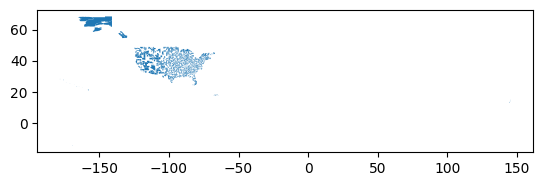

In [239]:
# 5. Plot the geo-dataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [240]:
# the statefp code for NY is 36
# select those
ny_counties = counties[counties.statefp == '36']


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [241]:
# 1. the names of counties in `ny_counties`, without repetition.
print(ny_counties.name.unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [242]:
# 2.names of counties in `spills_per_county`, without repetition
# these are in alphabetical order 
# has New Jersey- region 2 
print(spills_per_county.county.unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


In [243]:
# 3.find the county names that are in `spills_per_county`, 
# but not in `ny_counties`.
#spills_per_county.county.unique() is the array
      
print(np.setdiff1d(spills_per_county.county.unique(), # array of spill_per_county
                 ny_counties.name.unique(), # array of ny_counties
                  assume_unique=False))

['New Jersey - Region 2' 'St Lawrence' 'Tuscarora Indian Reservation']


In [244]:
# 4. county names that are in `ny_counties`, but not in `spills_per_county`
print(np.setdiff1d(ny_counties.name.unique(), # array of ny_counties
                 spills_per_county.county.unique(), # array of spill_per_county
                  assume_unique=False))

['St. Lawrence']


In [247]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'.

tusc = spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']
print(tusc) # there  is 1 spill there

                          county  n_spills
56  Tuscarora Indian Reservation         1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [326]:
# 1. row in `spills_per_county` that has 'St Lawrence'

spills_per_county[spills_per_county.county == 'St Lawrence']

,county,n_spills
50,St Lawrence,62


In [327]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [328]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [329]:
# 4. Use the `st_lawrence_index` and `at` 
# to update St Lawrence name in `spills_per_county` dataframe

spills_per_county.at[st_lawrence_index, 'county'] = 'St. Lawrence'

In [330]:
# 5. Check the update was successfull
print(spills_per_county.at[st_lawrence_index, 'county'])

St. Lawrence


### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [331]:
# 1. the column names for counties are different 
ny_counties = ny_counties.rename(columns = {'name' :'county'})

# check to see if it updated column name to 'county'
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'county', 'namelsad',
       'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat',
       'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [364]:
# 2. inner join two datasets
ny_counties = pd.merge(ny_counties,
                    spills_per_county,
                    how = 'inner',
                    on = 'county').set_index('county')

In [365]:
# udpate single row
# add 1 spill to Niagara for the Tuscarora Indian Reservation
# there were 88 spills before this code 

ny_counties.at['Niagara', 'n_spills'] += 1

In [366]:
# there are now 89 spills in Niagara
ny_counties[ny_counties.index == 'Niagara']

,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
county,,,,,,,,,,,,,,,,,,
Niagara,36,063,00974130,36063,Niagara County,06,H1,G4020,NaN,NaN,NaN,A,1352887560,1598842379,+43.2726719,-078.8129431,None,89


In [367]:
# reset the index
ny_counties = ny_counties.reset_index()

In [2]:
ny_counties

NameError: name 'ny_counties' is not defined

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

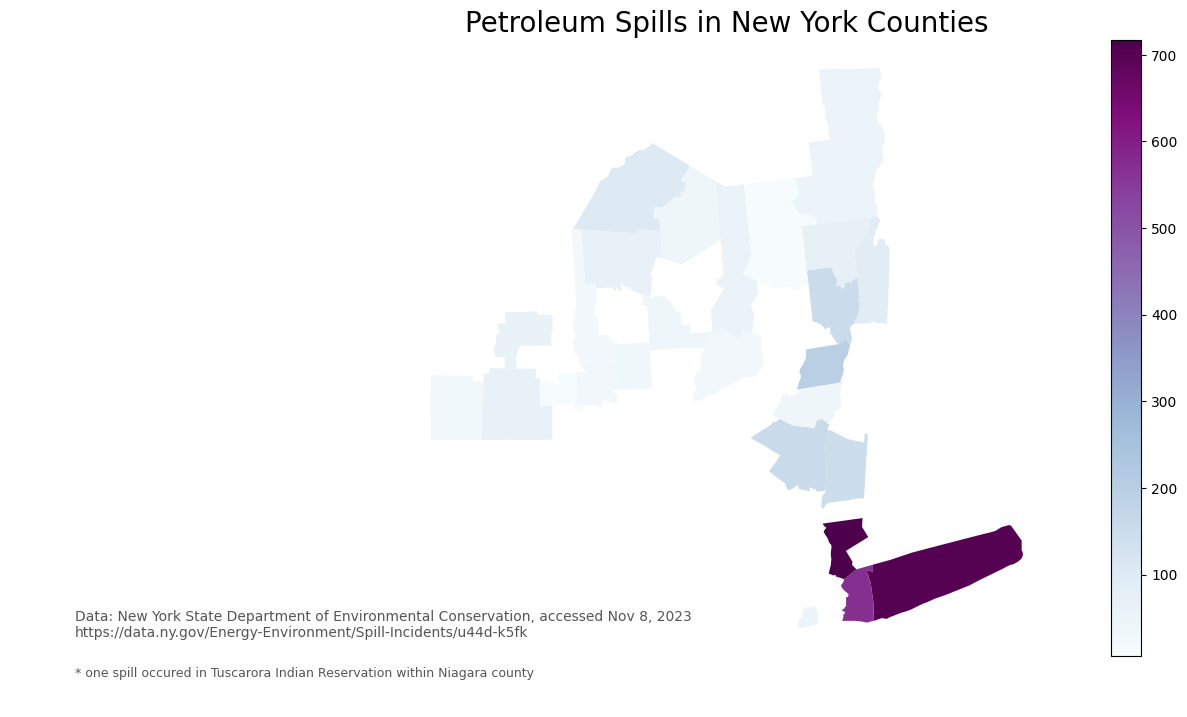

In [402]:
# map petroleum spills

fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')

#county.plot(ax=ax)
ny_counties.plot(ax=ax,
                 column = 'n_spills',
                 legend = True,
                 cmap = "BuPu")

ax.set_title('Petroleum Spills in New York Counties',  fontsize=20)

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 8, 2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.05, .1), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')

ax.annotate("* one spill occured in Tuscarora Indian Reservation within Niagara county", 
            xy=(0.05, .05), # position
            xycoords='figure fraction', 
            fontsize= 9, 
            color='#555555')

plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.